<a href="https://colab.research.google.com/github/Akhilesh-K-Yadav/Fine-tuned-BERT-for-text-classification/blob/main/Fine_Tune_BERT_for_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 1: BERT Classification Model</p>
</div>

The pretrained BERT model used in this project is [available](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2) on [TensorFlow Hub](https://tfhub.dev/).

In [ ]:
!nvidia-smi

Sat Sep 10 19:16:19 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Install TensorFlow and TensorFlow Model Garden
import tensorflow as tf
tf.version.VERSION

'2.3.0'

In [ ]:
!pip install -q numpy>=1.16.0


In [ ]:
!pip install -q scipy==1.4.1

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.3.0 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.21.6 which is incompatible.
plotnine 0.8.0 requires scipy>=1.5.0, but you have scipy 1.4.1 which is incompatible.
jaxlib 0.3.15+cuda11.cudnn805 requires scipy>=1.5, but you have scipy 1.4.1 which is incompatible.
jax 0.3.17 requires scipy>=1.5, but you have scipy 1.4.1 which is incompatible.


In [ ]:
!pip install google-cloud-bigquery[bqstorage,pandas]<2.0.0,>=1.11.1

/bin/bash: 2.0.0,: No such file or directory


In [ ]:
!pip install -q tensorflow==2.3.0

     |████████████████████████████████| 320.4 MB 51 kB/s 
     |████████████████████████████████| 26.1 MB 76.3 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
     |████████████████████████████████| 2.9 MB 49.0 MB/s 
     |████████████████████████████████| 459 kB 76.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.18.5 which is incompatible.
tables 3.7.0 requires numpy>=1.19.0, but you have numpy 1.18.5 which is incompatible.
plotnine 0.8.0 requires numpy>=1.19.0, but you have numpy 1.18.5 which is incompatible.
plotnine 0.8.0 requires scipy>=1.5.0, but you have scipy 1.4.1 which is incompatible.
jaxlib 0.3.15+cuda11.cudnn805 requires numpy>=1.19, but you have numpy 1.18.5 which is incompatible.
jaxlib 0.3.15+cuda11.cudnn805 requires scipy>=1.5, but you have scipy 1.4.1 whic

In [ ]:
tf.version.VERSION

'2.3.0'

In [ ]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 505), reused 1389 (delta 306), pack-reused 0
Receiving objects: 100% (2650/2650), 34.02 MiB | 29.62 MiB/s, done.
Resolving deltas: 100% (505/505), done.
Note: checking out '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>



In [ ]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.3.0 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.21.6 which is incompatible.
tensorflow 2.3.0 requires scipy==1.4.1, but you have scipy 1.7.3 which is incompatible.


In [ ]:
#Download and Import the Quora Insincere Questions Dataset
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

/usr/local/lib/python3.7/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.7.0 and strictly below 2.10.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.3.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


In [ ]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.3.0
Eager mode:  True
Hub version:  0.12.0
GPU is available


A downloadable copy of the [Quora Insincere Questions Classification data](https://www.kaggle.com/c/quora-insincere-questions-classification/data) can be found [https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip](https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip). Decompress and read the data into a pandas DataFrame.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip', compression='zip', low_memory=False)
df.shape

(1306122, 3)

<AxesSubplot:title={'center':'Target distribution'}, ylabel='Frequency'>

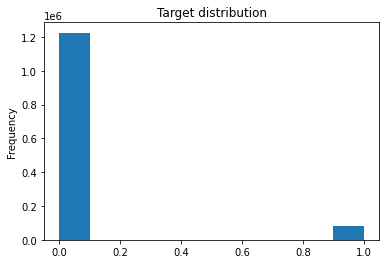

In [ ]:
#Plot using pandas:
df.target.plot(kind='hist', title='Target distribution')

In [ ]:
train_df, remaining = train_test_split(df, random_state=42, train_size=0.0075, stratify=df.target.values)
val_df, _ = train_test_split(remaining, random_state=42, train_size=0.00075, stratify= remaining.target.values)
train_df.shape, val_df.shape

((9795, 3), (972, 3))

In [ ]:
with tf.device('/cpu:0'):
  train_data = tf.data.Dataset.from_tensor_slices((train_df['question_text'].values, train_df['target'].values))
  val_data = tf.data.Dataset.from_tensor_slices((val_df['question_text'].values, val_df['target'].values))

  for text, label in train_data.take(1):
    print(text)
    print(label)

tf.Tensor(b'Why are unhealthy relationships so desirable?', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


In [ ]:
#Download a Pre-trained BERT Model from TensorFlow Hub

"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""

# Label categories
label_list = [0, 1]
# maximum length of (token) input sequences
max_seq_length = 128

train_batch_size = 32

# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2
bert_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2', trainable=True)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)



In [ ]:
#Shows all should be small lettered
tokenizer.wordpiece_tokenizer.tokenize('Hi, how are you?')

['[UNK]', 'how', 'are', 'you', '##?']

In [ ]:
tokenizer.convert_tokens_to_ids(tokenizer.wordpiece_tokenizer.tokenize('Hi, how are you?'))

[100, 2129, 2024, 2017, 29632]

In [ ]:
#Tokenize and preprocess text for BERT

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1-SpKFELnEvBMBqO7h3iypo8q9uUUo96P' />
    <p style="text-align: center;color:gray">Figure 2: BERT Tokenizer</p>
</div>

We'll need to transform our data into a format BERT understands. This involves two steps. First, we create InputExamples using `classifier_data_lib`'s constructor `InputExample` provided in the BERT library.

In [ ]:
#Func to convert row to features and label
def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  example = classifier_data_lib.InputExample(guid = None,
                                             text_a = text.numpy(),
                                             text_b = None,
                                             label = label.numpy())
  feature = classifier_data_lib.convert_single_example(0, example, label_list, max_seq_length, tokenizer)

  return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)

You want to use [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) to apply this function to each element of the dataset. [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) runs in graph mode.

- Graph tensors do not have a value.
- In graph mode you can only use TensorFlow Ops and functions.

So you can't `.map` this function directly: You need to wrap it in a [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function). The [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function) will pass regular tensors (with a value and a `.numpy()` method to access it), to the wrapped python function.

In [ ]:
#Wrap a python func into a tensorflow op for eager execution
def to_feature_map(text, label):
  input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature, 
                                                                 inp=[text, label], 
                                                                 Tout=[tf.int32, tf.int32, tf.int32, tf.int32])
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])

  x = {
      'input_word_ids' : input_ids,
       'input_mask' : input_mask,
       'input_type_ids' : segment_ids
  }

  return (x, label_id)

In [ ]:
from tensorflow.python.data.ops.dataset_ops import AUTOTUNE
#Tensorflow input pipeline with tf.Data:
with tf.device('/cpu:0'):
  train_data = (train_data.map(to_feature_map,
                                num_parallel_calls=AUTOTUNE) 
  .shuffle(1000)
  .batch(32, drop_remainder=True)
  .prefetch(AUTOTUNE)    
  )

  val_data = (val_data.map(to_feature_map,
                                num_parallel_calls=AUTOTUNE)
  .batch(32, drop_remainder=True)
  .prefetch(AUTOTUNE)    
  )

The resulting `tf.data.Datasets` return `(features, labels)` pairs, as expected by [`keras.Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit):

In [ ]:
#train_data spec
train_data.element_spec

({'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 3: BERT Layer</p>
</div>

In [ ]:
#model:
def create_model():
  input_word_ids=tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name='input_word_ids')
  input_mask=tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name='input_mask')
  segment_ids=tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name='segment_ids')

  pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

  drop = tf.keras.layers.Dropout(0.4)(pooled_output)
  output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(drop)

  model = tf.keras.Model(
      inputs={
          'input_word_ids' : input_word_ids,
          'input_mask' : input_mask,
          'input_type_ids' : segment_ids
      },
      outputs=output
  )

  return model

In [ ]:
model = create_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 128)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 128)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]      

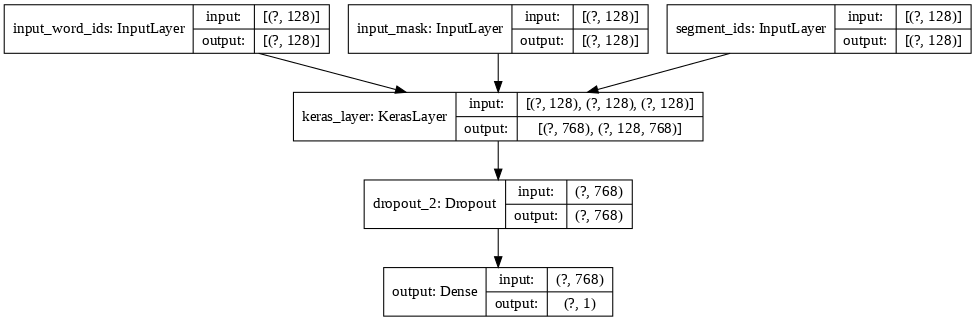

In [ ]:
tf.keras.utils.plot_model(model=model, show_shapes=True, dpi=76)

In [ ]:
#Train
history = model.fit(train_data, validation_data=val_data, epochs=4, verbose=1)

Epoch 1/4
306/306 [==============================] - ETA: 0s - loss: 0.1925 - binary_accuracy: 0.9268

306/306 [==============================] - 244s 796ms/step - loss: 0.1925 - binary_accuracy: 0.9268 - val_loss: 0.1219 - val_binary_accuracy: 0.9500
Epoch 2/4
306/306 [==============================] - 248s 811ms/step - loss: 0.1049 - binary_accuracy: 0.9597 - val_loss: 0.1392 - val_binary_accuracy: 0.9500
Epoch 3/4
306/306 [==============================] - 248s 812ms/step - loss: 0.0581 - binary_accuracy: 0.9776 - val_loss: 0.1971 - val_binary_accuracy: 0.9542
Epoch 4/4
306/306 [==============================] - 248s 811ms/step - loss: 0.0274 - binary_accuracy: 0.9913 - val_loss: 0.2275 - val_binary_accuracy: 0.9542


In [ ]:
#Eval:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

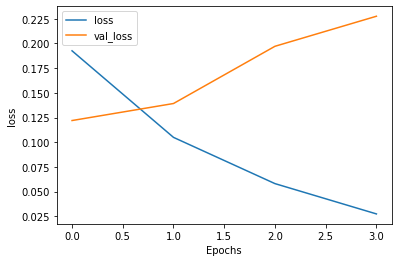

In [ ]:
plot_graphs(history, 'loss')

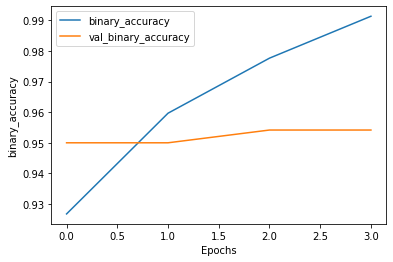

In [ ]:
plot_graphs(history, 'binary_accuracy')

In [ ]:
samples=['this is nice']
test_data = tf.data.Dataset.from_tensor_slices((samples, [0]*len(samples)))
test_data = (test_data.map(to_feature_map).batch(1))
preds= model.predict(test_data)
threshold = 0.5
['Insincere' if pred >= threshold else 'Sincere' for pred in preds]

['Sincere']